# Import Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# Load the Iris dataset from sklearn
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

df["Species"] = df.Species.str.replace("Iris-","")

# Map species to target label
name2label = {'setosa':0, 'versicolor':1, 'virginica':2}


df['target'] = df.Species.map(name2label)

# Displaying the first five rows of the dataset
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0


# Analyze Dataframe

In [3]:
# Checking the dataset's information
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   target         150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


None

In [4]:
# Checking the dataset's description
display(df.describe())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


# Select Features

In [5]:
FEATURES = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
TARGET = ['target']

# Pairwise Feature Relation

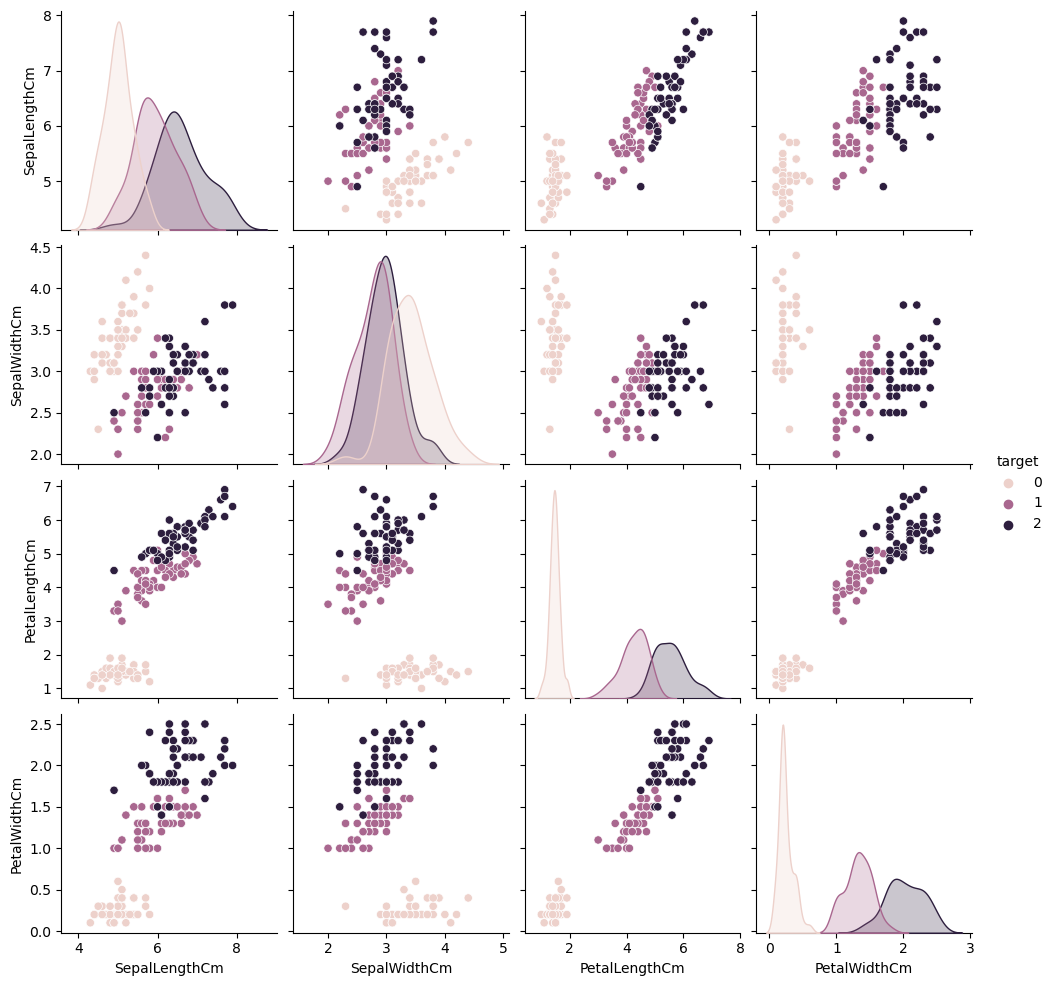

In [6]:
# Visualizing the pairwise relationship of different parameters using seaborn pairplot
sns.pairplot(df[FEATURES+TARGET], hue='target')
plt.show()

# Violin Plot

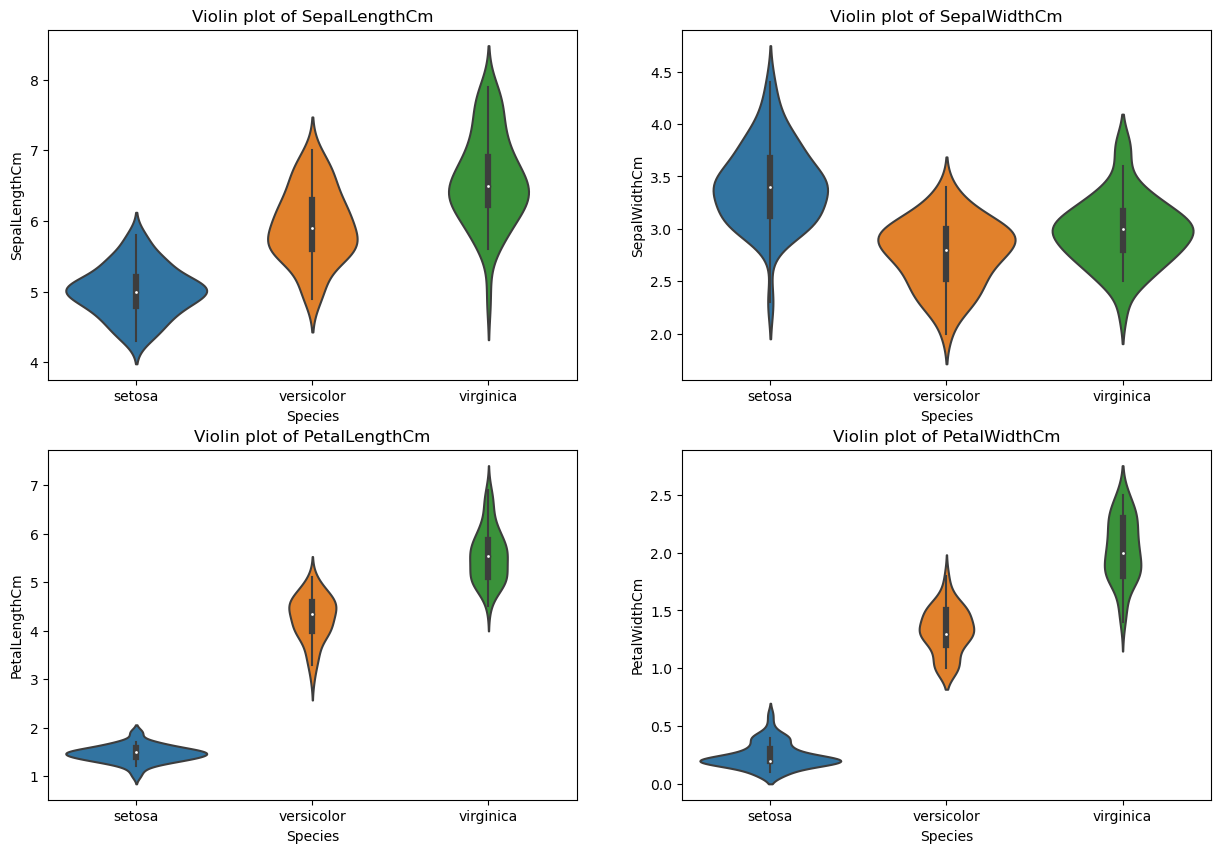

In [7]:
# Define a figure to which we will add a violin plot for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Create a violin plot for each feature
for i, ax in enumerate(axes.flatten()):
    sns.violinplot(ax=ax, x='Species', y=FEATURES[i], data=df)
    ax.set_title(f'Violin plot of {FEATURES[i]}')

# Ensure the plot displays correctly
# plt.tight_layout()
plt.show()


# Class Distribution

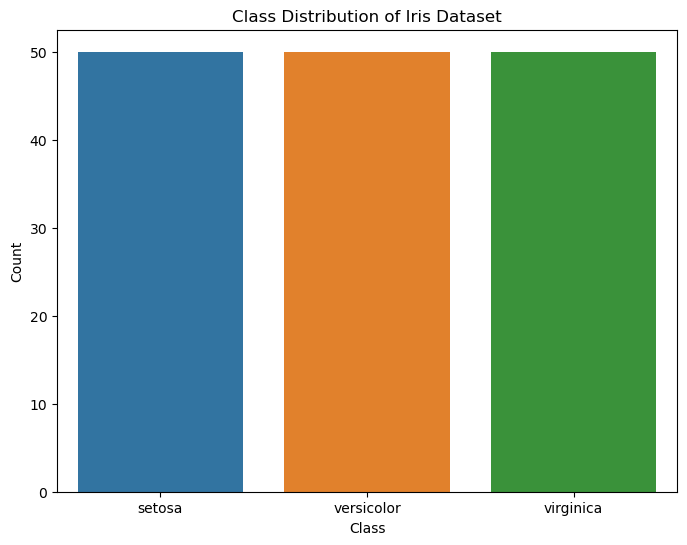

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution of Iris Dataset")
plt.show()

# Data Split

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.5, random_state=0)

# Train features and labels
x_train = train_df[FEATURES]
x_train += np.random.uniform(size=x_train.shape) # add some noise
y_train = train_df[TARGET]

# Test features and labels
x_test = test_df[FEATURES]
x_test += np.random.uniform(size=x_test.shape) # add some noise
y_test = test_df[TARGET]

# Define Metric

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# SVM
Support Vector Machines (SVM) is a machine learning algorithm used for classification tasks. It finds an optimal hyperplane to separate different classes by maximizing the margin. SVM is useful when:

> A **hyperplane** is a decision boundary that separates different classes in a machine learning model.

Application:
* Dealing with datasets that have many features.
* Handling both linearly separable and non-linearly separable data.
* Working with small to medium-sized datasets.

Examples:

* 1D to 2D
<img src="https://dinhanhthi.com/img/post/ML/support-vector-machine/svm-2.jpg">

* 2D to 3D
<img src="https://editor.analyticsvidhya.com/uploads/1403824.png">

In [11]:
from sklearn.svm import SVC

# Create and train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9066666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.85      0.93      0.89        30
           2       0.90      0.79      0.84        24

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Boundaries of SVM

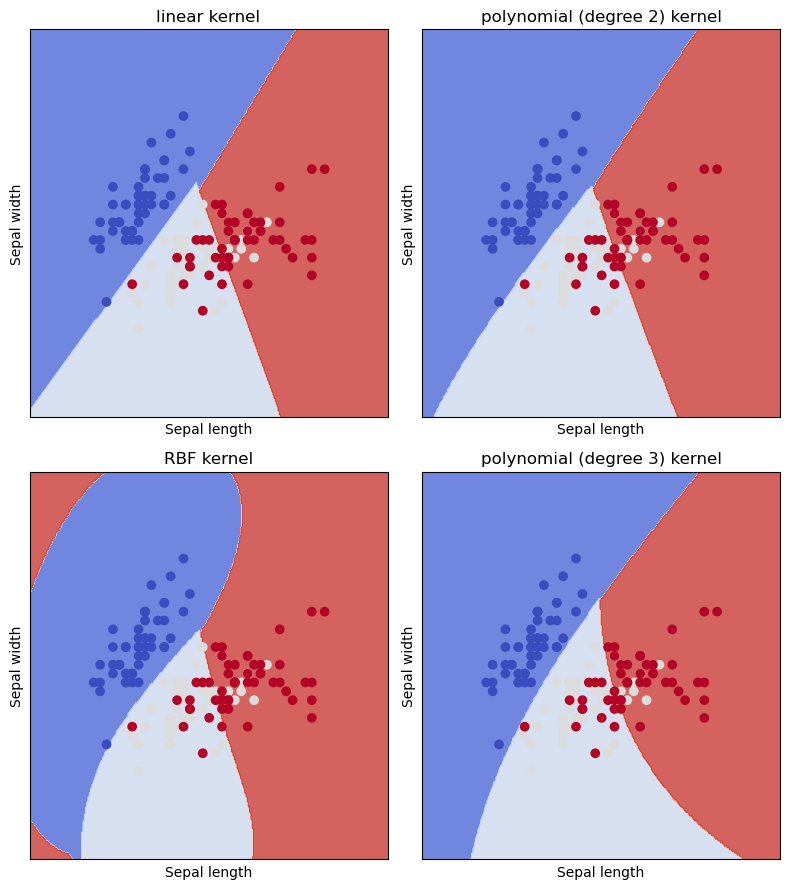

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = df.loc[:, FEATURES[:2]].values  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = df.loc[:, TARGET].values.ravel()

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
poly_svc2 = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['linear kernel',
          'polynomial (degree 2) kernel',
          'RBF kernel',
          'polynomial (degree 3) kernel']

plt.figure(figsize=(8,9))
for i, clf in enumerate((svc, poly_svc2, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.tight_layout()
plt.show()

# Xgboost
XGBoost is a gradient boosting framework that combines weak models to create a strong predictive model. It works by iteratively adding decision trees to minimize prediction errors. 

Application:
* Dealing with structured/tabular data.
* Handling imbalanced datasets.
* Working with small-scale datasets.
* Interpreting feature importance is important.

In [13]:
import xgboost as xgb

# Create and train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75



## Plot Decision Tree
* `num_trees`: Specify the ordinal number of target tree

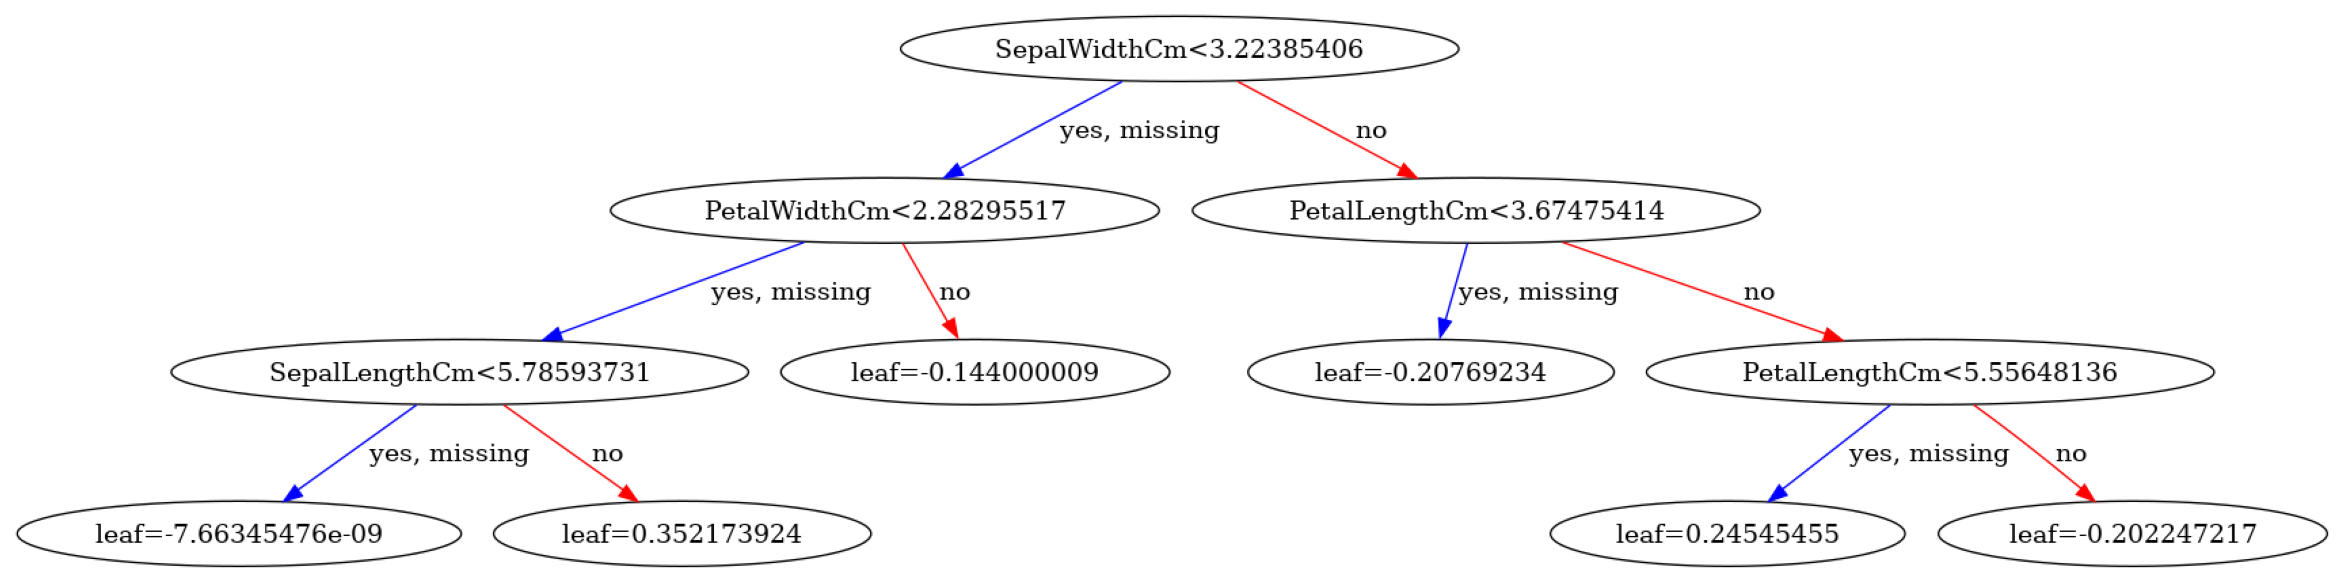

In [14]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(xgb_model, num_trees=1, ax=ax)
plt.show()

## Feature Importance
* `weight`: is the number of times a feature appears in a tree

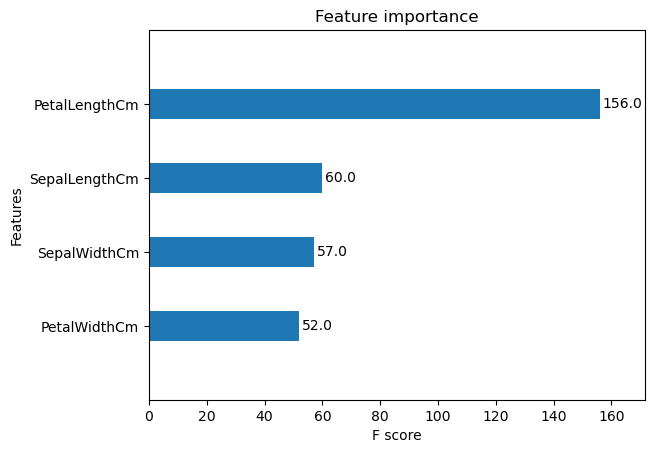

In [15]:
# plt.figure(figsize=(20, 10))
xgb.plot_importance(xgb_model, importance_type='weight', grid=False, height=0.4);
plt.show()

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9066666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.83      0.97      0.89        30
           2       1.00      0.83      0.91        24

    accuracy                           0.91        75
   macro avg       0.93      0.90      0.91        75
weighted avg       0.92      0.91      0.91        75



/tmp/ipykernel_20/3493900169.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


## Plot Decision Tree

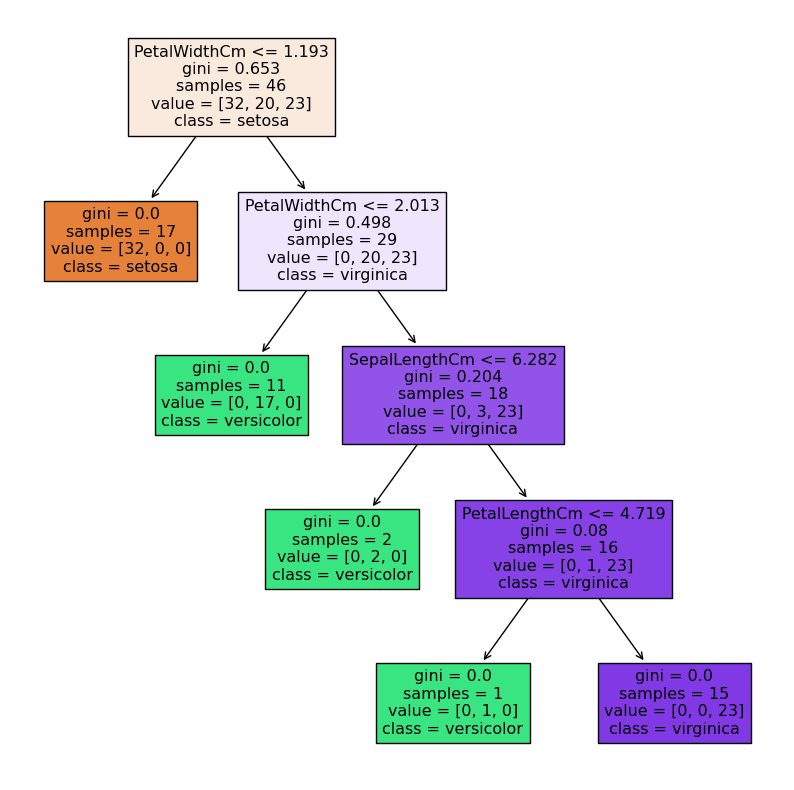

In [17]:
from sklearn import tree
TREE_INDEX = 0
plt.figure(figsize=(10,10))
tree.plot_tree(rf_model.estimators_[TREE_INDEX],
               feature_names=FEATURES,
               class_names=list(name2label.keys()),
               filled=True);

# Feature Imporance

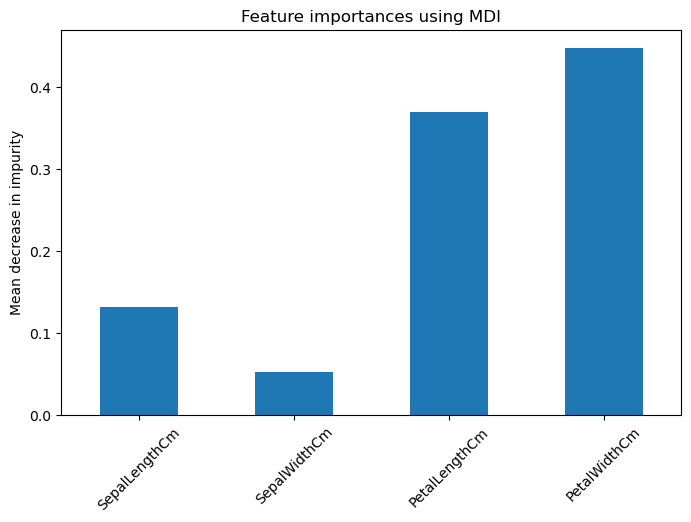

In [18]:
forest_importances = pd.Series(rf_model.feature_importances_ , index=FEATURES)

plt.figure(figsize=(8,5))
forest_importances.plot.bar()
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.xticks(rotation=45);

# Ensemble

Ensemble learning is a machine learning technique that combines multiple models to create a more accurate and robust predictive model. It is used to improve predictive performance, increase generalization capabilities, and reduce the risk of overfitting by leveraging the collective wisdom of diverse models.

In the TV series "House MD," a team of doctors collaboratively diagnoses complex medical cases,  aka **ensemble**.

<img src="https://c4.wallpaperflare.com/wallpaper/592/95/805/gregory-house-house-m-d-jennifer-morrison-wallpaper-preview.jpg" width=600>


# Types of Ensemble

Broadly there are three types of Enembling,

1. `Bagging`:
Bagging ensembling involves training multiple independent models on different subsets or same portion of the training data and combining their predictions, resulting in improved predictive performance and reduced variance.
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png" width=600>

2. `Boosting`:
Boosting is an ensemble learning technique that trains models sequentially, with each model focusing on correcting the mistakes of the previous models, leading to a strong predictive model.
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png" width=600>

3. `Stacking`:
Stacking is an ensemble learning technique that combines predictions from multiple models by training a meta-model, leveraging the strengths of individual models to improve overall prediction performance.
<img src="https://editor.analyticsvidhya.com/uploads/39725Stacking.png" width=600>
          

## Bagging Vs Boosting Vs Stacking
| Technique   | Description                           | Example                                   | Additional Information                                                                                       |
|-------------|---------------------------------------|-------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| Bagging     | Ensemble of independently trained models using bootstrap samples | Random Forest                            | Bootstrap samples are created by randomly selecting data points with replacement, allowing for variations in the training sets |
| Boosting    | Sequentially trains models, with each model correcting the mistakes of the previous models | AdaBoost, Gradient Boosting              | Bootstrap is not explicitly used in boosting; instead, it focuses on assigning higher weights to misclassified instances |
| Stacking    | Combines predictions from multiple models by training a meta-model | Using a combination of classifiers, such as decision trees, logistic regression, and neural networks, and a meta-model to make final predictions | Bootstrap can be used as part of the training process to create diverse subsets for the individual models used in stacking |


In [19]:
# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict_proba(x_test)


# Create and train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict_proba(x_test)


# Create and train an SVM model
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict_proba(x_test)


# Combine predictions from XGBoost, SVM, and Random Forest using mean ensemble
y_pred_ensemble = (y_pred_xgb + y_pred_svm + y_pred_rf) / 3


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ensemble.argmax(axis=-1))
report = classification_report(y_test, y_pred_ensemble.argmax(axis=-1))

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75



/tmp/ipykernel_20/1615799073.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
